In [100]:
# Load libraries
import numpy as np
from matplotlib import pyplot
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import fetch_openml


In [54]:
filename = fetch_openml(name='sonar', version=1, as_frame=True)
dataset = filename.frame

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
set_option('display.max_rows',500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60    float64
dtype: object


In [4]:
set_option('display.precision',3)
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,1.670e-02,0.018,8.400e-03,9.000e-03,0.003,NaN
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,1.910e-02,0.014,4.900e-03,5.200e-03,0.004,NaN
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,2.440e-02,0.032,1.640e-02,9.500e-03,0.008,NaN
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,7.300e-03,0.005,4.400e-03,4.000e-03,0.012,NaN
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,1.500e-03,0.007,4.800e-03,1.070e-02,0.009,NaN
5,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,8.900e-03,0.006,2.700e-03,5.100e-03,0.006,NaN
6,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.140,0.208,0.351,...,0.020,0.025,0.013,0.007,1.380e-02,0.009,1.430e-02,3.600e-03,0.010,NaN
7,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,...,0.008,0.012,0.004,0.012,9.700e-03,0.009,4.700e-03,4.800e-03,0.005,NaN
8,0.022,0.037,0.048,0.048,0.065,0.059,0.075,0.010,0.068,0.149,...,0.015,0.013,0.015,0.006,4.900e-03,0.006,9.300e-03,5.900e-03,0.002,NaN
9,0.016,0.017,0.035,0.007,0.019,0.067,0.106,0.070,0.096,0.025,...,0.009,0.022,0.018,0.008,6.800e-03,0.003,3.500e-03,5.600e-03,0.004,NaN


In [5]:
set_option('display.precision',3)
print(dataset.describe())

            0          1        2        3        4        5        6   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373   

            7        8        9   ...         51         52       53  \
count  208.000  208.000  208.000  ...  2.080e+02  2.080e+02  208.000   
mean     0.135    0.178    0.208  ...  1.342e-02  1.071e-02    0.011   
std      0.085    0.118    0.134  ...  9.634e-03  7.060e-03    0.007   
min      0.005    0.007    0.011  ...  8.000e

In [6]:
print(dataset.groupby(60).size())

Series([], dtype: int64)


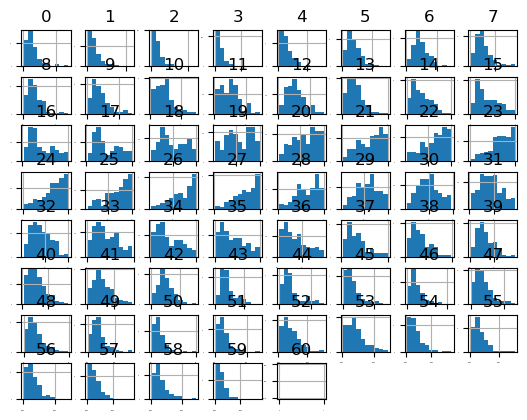

In [7]:
dataset.hist(sharex=False, sharey=False,xlabelsize=1,ylabelsize=1)
pyplot.show()

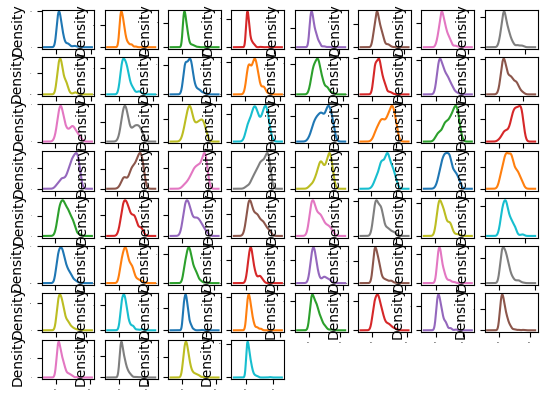

In [55]:
dataset.plot(kind='density',subplots=True,layout=(8,8),sharex=False, legend=False,
             fontsize=1)
pyplot.show()

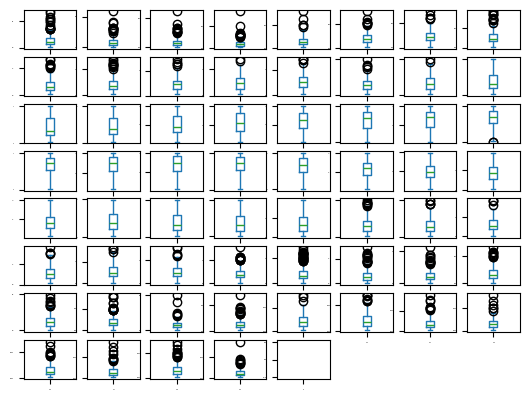

In [10]:
dataset.plot(kind='box',subplots=True,layout=(8,8),sharex=False,sharey=False,fontsize=1)
pyplot.show()

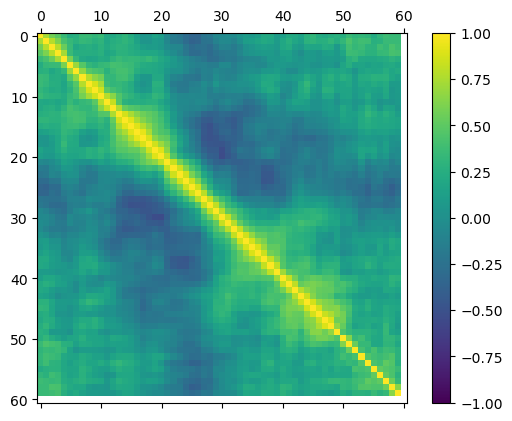

In [15]:
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(dataset.corr(),vmin=-1,vmax=1)
fig.colorbar(cax)
pyplot.show()

In [56]:
for col in dataset.columns[:-1]:  # Exclude the last column ('Class')
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Ensure the target column ('Class') is categorical
dataset['Class'] = dataset['Class'].astype('category')

# Drop rows with NaN values
dataset = dataset.dropna()

In [57]:
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]

In [58]:
# Split into training and validation sets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, Y, test_size=validation_size, random_state=seed, shuffle=True
)

In [59]:
num_folds=10
seed=7
scoring='accuracy'


In [60]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [61]:
# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.777574 (0.088423)
LDA: 0.778676 (0.093570)
KNN: 0.758824 (0.106417)
CART: 0.740074 (0.095773)
NB: 0.682721 (0.136040)
SVM: 0.765074 (0.087519)


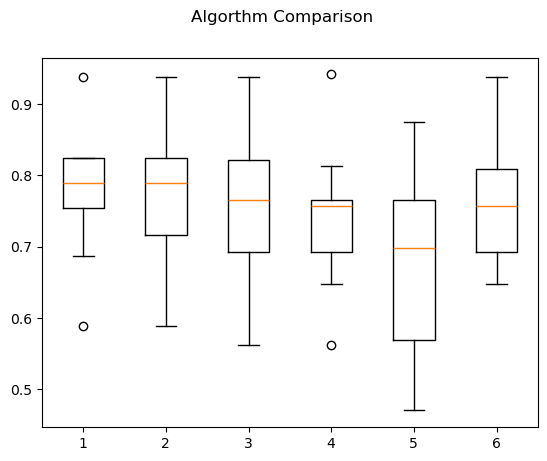

In [66]:
fig=pyplot.figure()
fig.suptitle('Algorthm Comparison')
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [71]:
pipelenes=[]
pipelenes.append((('ScaledLR'),Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelenes.append((('ScaledLDA'),Pipeline([('Scaler', StandardScaler()),('DDA',LinearDiscriminantAnalysis())])))
pipelenes.append((('ScaledKNN'),Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelenes.append((('ScaledCART'),Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelenes.append((('ScaledNB'),Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelenes.append((('ScaledSVM'),Pipeline([('Scaler', StandardScaler()),('SVM',SVC())])))

results=[]
names=[]

for name,model in pipelenes:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

ScaledLR: 0.754412 (0.067926)
ScaledLDA: 0.778676 (0.093570)
ScaledKNN: 0.808456 (0.107996)
ScaledCART: 0.739706 (0.092743)
ScaledNB: 0.682721 (0.136040)
ScaledSVM: 0.826103 (0.081814)


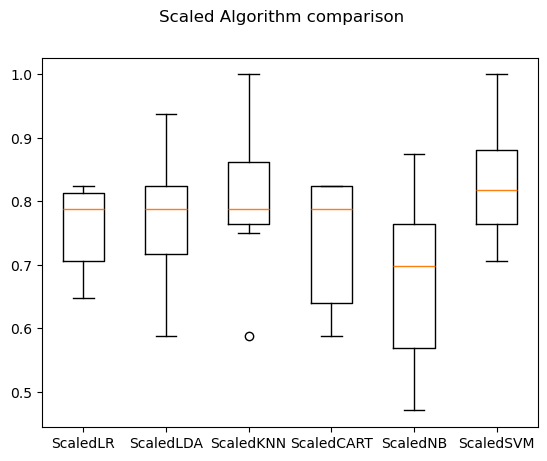

In [77]:
fig=pyplot.figure()
fig.suptitle('Scaled Algorithm comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [86]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

Best: 0.836029 using {'n_neighbors': 1}
0.836029 (0.079487) with: {'n_neighbors': 1}
0.813603 (0.088021) with: {'n_neighbors': 3}
0.814338 (0.096870) with: {'n_neighbors': 5}
0.777574 (0.120387) with: {'n_neighbors': 7}
0.730147 (0.099376) with: {'n_neighbors': 9}
0.741544 (0.073970) with: {'n_neighbors': 11}
0.710662 (0.105829) with: {'n_neighbors': 13}
0.723162 (0.080983) with: {'n_neighbors': 15}
0.698897 (0.072669) with: {'n_neighbors': 17}
0.710662 (0.091337) with: {'n_neighbors': 19}
0.698897 (0.091195) with: {'n_neighbors': 21}


In [94]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid=dict(C=c_values,kernel=kernel_values)
model=SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

Best: 0.850000 using {'C': 1.7, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.1, 'kernel': 'linear'}
0.582721 (0.127062) with: {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with: {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with: {'C': 0.3, 'kernel': 'linear'}
0.644118 (0.099873) with: {'C': 0.3, 'kernel': 'poly'}
0.742279 (0.081853) with: {'C': 0.3, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with: {'C': 0.5, 'kernel': 'linear'}
0.704779 (0.098225) with: {'C': 0.5, 'kernel': 'poly'}
0.784559 (0.068922) with: {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with: {'C': 0.7, 'kernel': 'linear'}
0.759559 (0.093807) with: {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with: {'C': 0.7, 'kernel': 'rbf'}
0.761029 (0.079602) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with: {'C': 0.9, 'kernel': 'linear'

In [97]:
#   Ensemble Methods
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name,model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

AB: 0.782721 (0.072445)
GBM: 0.807721 (0.105522)
RF: 0.845221 (0.099203)
ET: 0.826103 (0.094594)


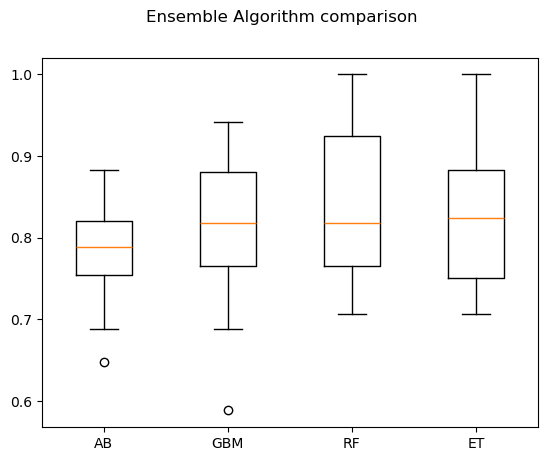

In [98]:
fig=pyplot.figure()
fig.suptitle('Ensemble Algorithm comparison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [103]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=SVC(C=1.5)
model.fit(rescaledX,Y_train)

rescaledValidationX=scaler.transform(X_validation)
prdictions=model.predict(rescaledValidationX)
print(accuracy_score(Y_validation,prdictions))
print(confusion_matrix(Y_validation,prdictions))
print(classification_report(Y_validation,prdictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

        Mine       0.92      0.85      0.88        27
        Rock       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

